# <center>Sloan Digital Sky Survey DR17 - Stellar Classification



for **Module 7 - Machine Learning** from **Programa UPskill - Digital Skills & Jobs**
    
by **Daniel Barreto**
    
**August, 2022** - Lisbon, Portugal

## Content

1. [Introduction](#1)
1. [Import Python Libraries](#2)
1. [Dataset](#3)
    * [Load](#3.1)
    * [Data Wrangling](#3.2)
        * [Features - Data types and Null Count](#3.2.1)
        * [DataFrame Table Visualization](#3.2.2)
    * [Exploratory Data Analysis](#3.3)
        * [Feature Selection](#3.3.1)
        * [Outliers](#3.3.2)
        * [Correlation Matrix](#3.3.3)
        * [Correlation Scatter Plots](#3.3.4)
        * [Target Feature](#3.3.5)
        * [Data Standardization](#3.3.6)
1. [Supervised Learning](#4)
    * [Train and test data](#4.1)
    * [Support Vector Machines](#4.2)
        * [Support Vector Classification](#4.2.1)
        * [SVC Confusion Matrices](#4.2.2)
        * [Discussion](#4.2.3)
    * [Random Forests](#4.3)
        * [Random Forest Classification](#4.3.1)
        * [Random Forest Confusion Matrix](#4.3.2)
        * [Discussion](#4.3.3)
    * [Decision Trees](#4.4)
        * [Decision Tree](#4.4.1)
        * [Decision Tree Confusion Matrix](#4.4.2)
        * [Discussion](#4.4.3)
1. [Conclusion](#5)
1. [Future Work](#6)
1. [Bibliography](#7)

<a id='1'></a>
## 1. Introduction

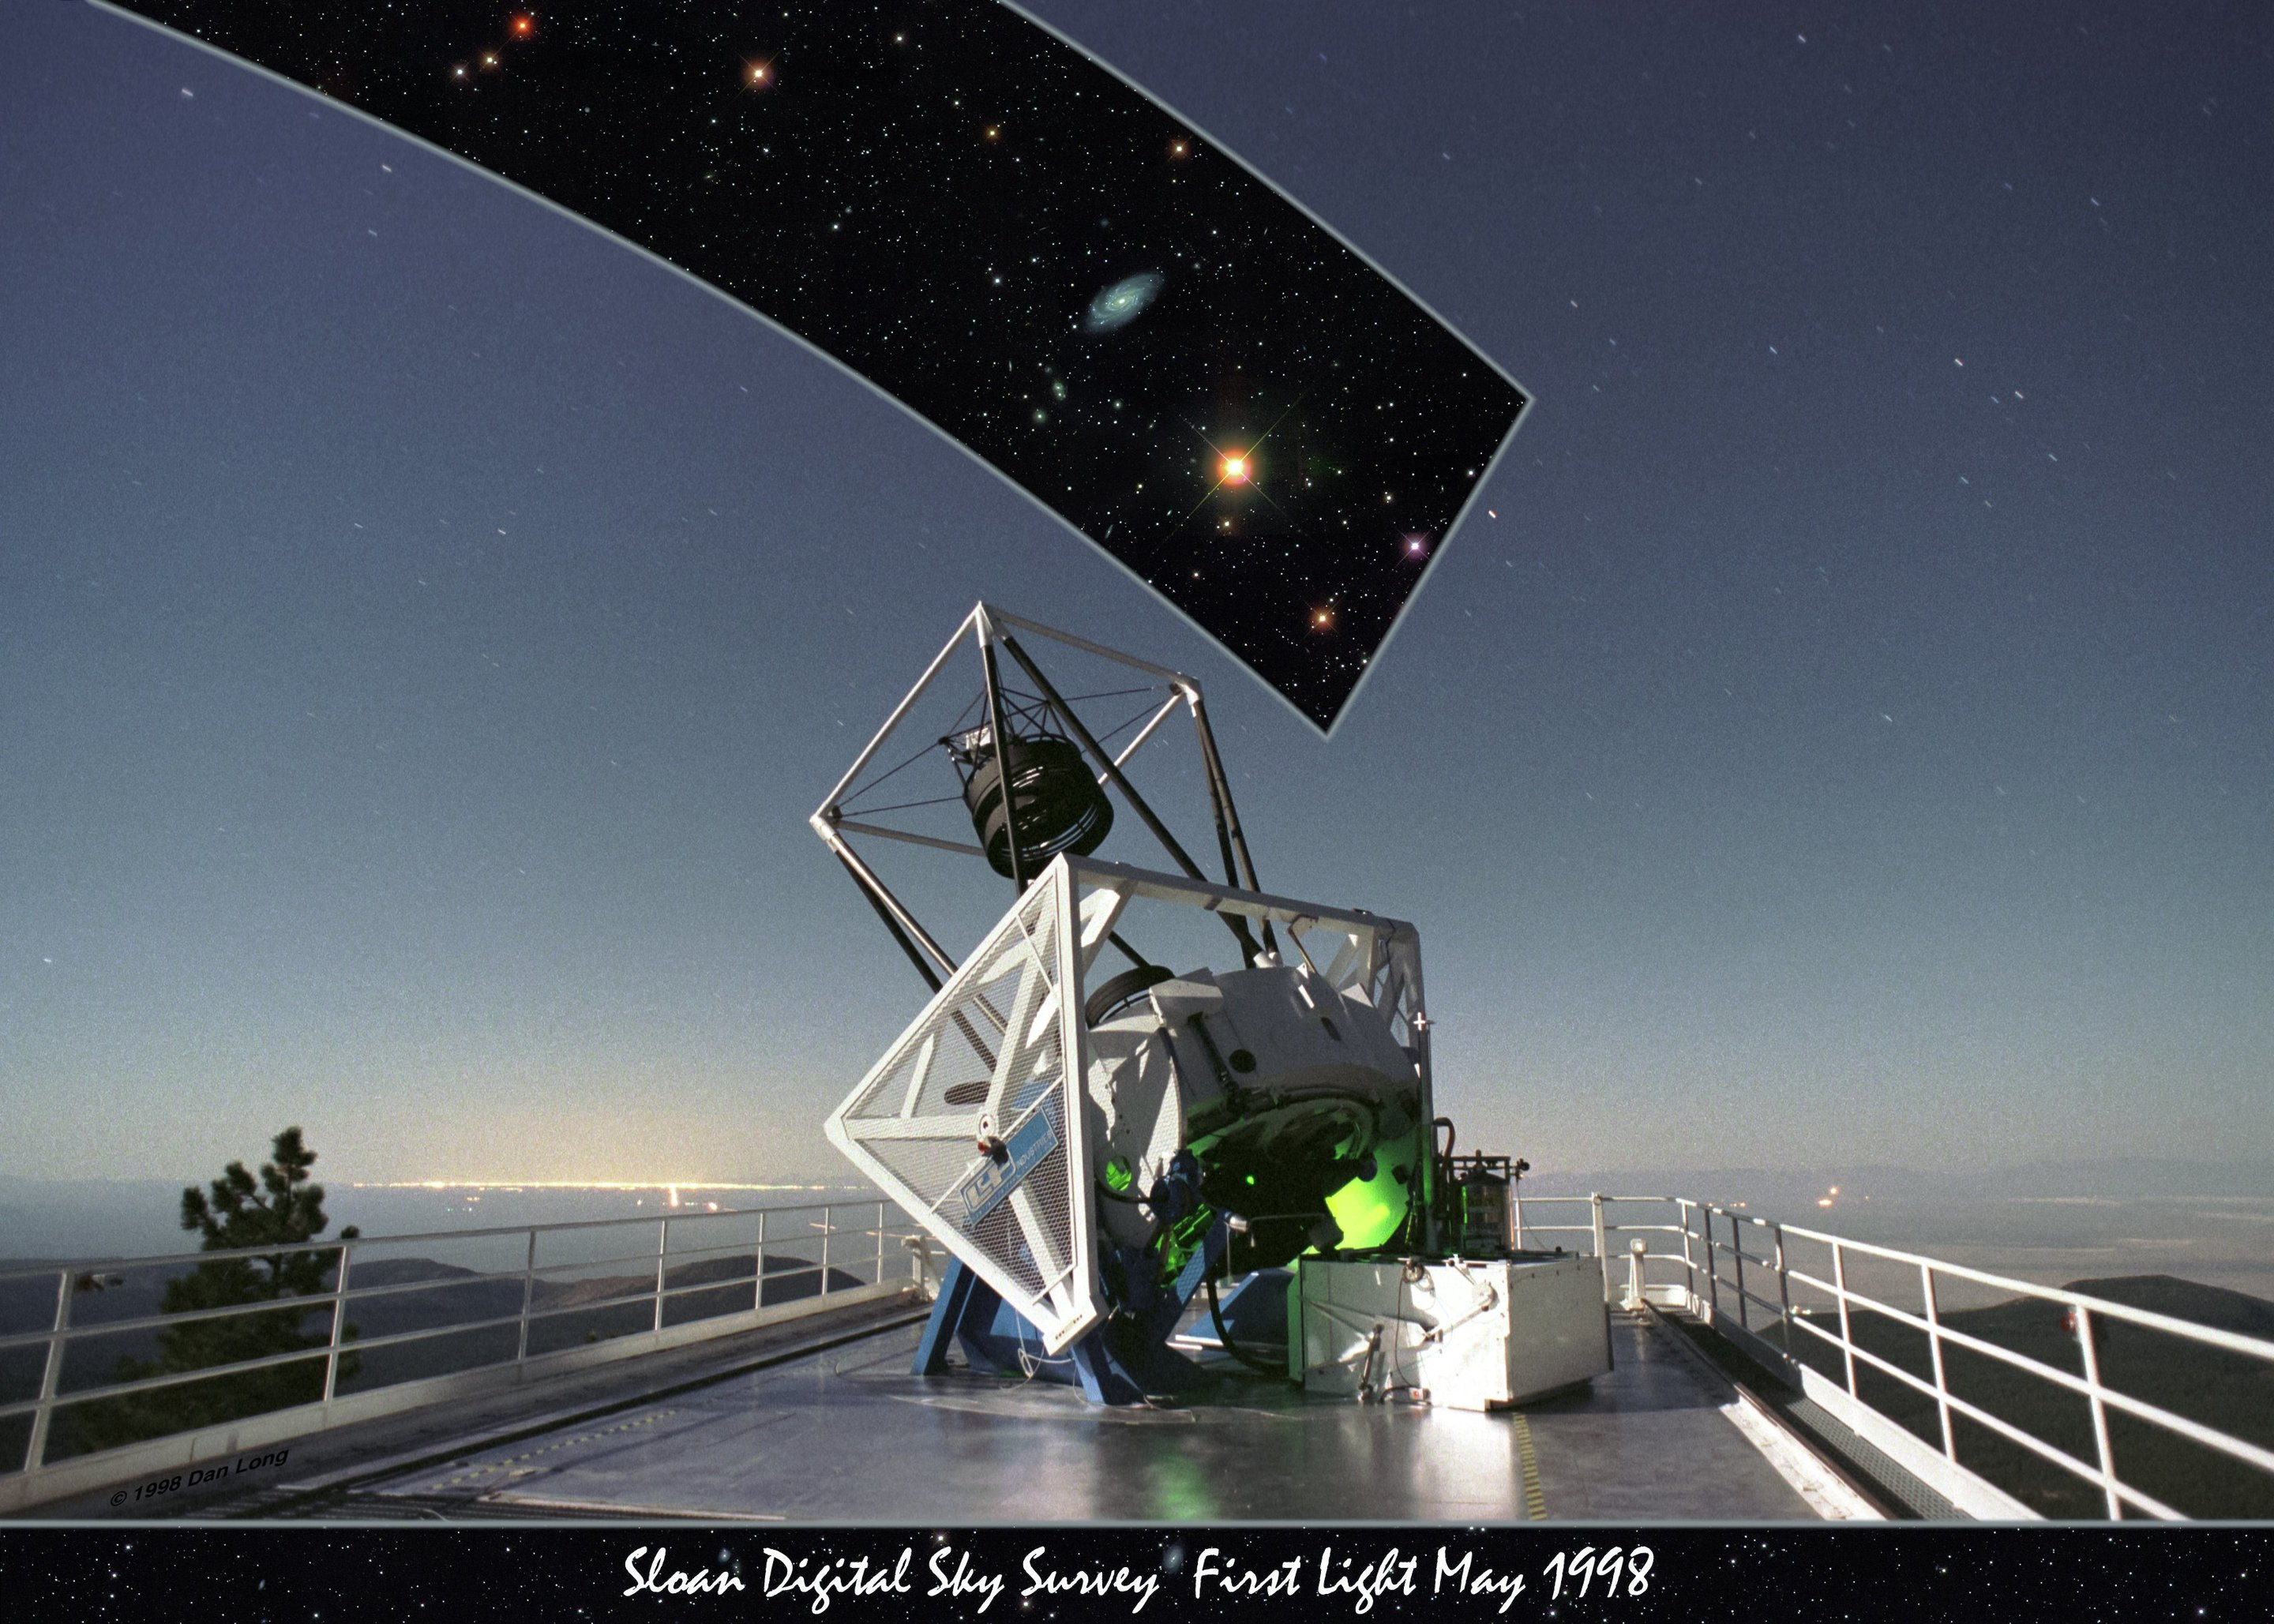

In 1998 the Sloan Digital Sky Survey (SDSS) begun collecting light to create the most ambitious sky map in the history of astronomy.
With a capability to image large fields of view of the night sky at a time, its 2.5m mirror wide angle telescope and a variety of modern digital detectors, collected photometric data with **deep multi-color images of one third of the sky** and spectra for more than three million astronomical objects. The photometer used an array of CCDs to convert electromagnetic radiation into electrical signals. The light that reaches these sensors, passes trough specialized optical bandpass filters in order to acquire different images of the same object in a multitude of wavelenghts. The SDSS photometer has 5 different filters - **ultraviolet, green, red, near infrared and infrared wavelengths**. These wavelenghts can then be used to study, catalog and classify different astronomical objects. Data from the SDSS as been released in various phases throughout the years and can be acessed online ( https://www.sdss.org/ ).

The dataset used in this notebook consists of **100000 observations** of astronomical objects taken from the SDSS Data Release 17 (released in December 2021). Every instance is described by **18 numerical features** and **1 categorical feature** which identifies it to be either a star, galaxy or quasar.


The objective of this project is to explore and analyse the dataset in order to apply a variety of machine learning algorithms to achieve a good accuracy in predicting the astronomical objects classification mentioned above.

<br>
<center> <video controls src="sdss_intro.mp4" /> </center>
<center> Introduction to the Sloan Digital Sky Survey</center>

<a id='2'></a>
## 2. Import Python Libraries

The following cell is used to import all the necessary libraries this notebook is gonna need to run all the python code.

In [1]:
#from IPython.display import HTML

# Exploratory data analysis:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supervised learning:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# other libraries
import time
# pip install imblearn
# from imblearn.over_sampling import SMOTE
# from collections import Counter

<a id='3'></a>
## 3. Dataset

The dataset consists of 100000 instances with 19 features, of which 18 are numerical and 1 is categorical. This last one will be the prediction target for our machine learning algorithms.


These features are as follows:

1. **obj_ID** - Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. **alpha** - Right Ascension angle (at J2000 epoch)
3. **delta** - Declination angle (at J2000 epoch)
4. **u** - Ultraviolet filter in the photometric system
5. **g** - Green filter in the photometric system
6. **r** - Red filter in the photometric system
7. **i** - Near Infrared filter in the photometric system
9. **z** - Infrared filter in the photometric system
10. **run_ID** - Run Number used to identify the specific scan
11. **rereun_ID** - Rerun Number to specify how the image was processed
12. **cam_col** - Camera column to identify the scanline within the run
13. **field_ID** - Field number to identify each field
14. **spec_obj_ID** - Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
15. **class** - object class (galaxy, star or quasar object)
16. **redshift** - redshift value based on the increase in wavelength
17. **plate** - plate ID, identifies each plate in SDSS
18. **MJD** - Modified Julian Date, used to indicate when a given piece of SDSS data was taken
19. **fiber_ID** - fiber ID that identifies the fiber that pointed the light at the focal plane in each observation


<a id='3.1'></a>
### 3.1. Load

The dataset consists of one csv file, which the following code will read with pandas library.

In [2]:
df = pd.read_csv('sdss_classification.csv', sep=',')

<a id='3.2'></a>
### 3.2. Data Wrangling

<a id='3.2.1'></a>
#### 3.2.1. Features - Data types and Null Count

From the result bellow we can see each features data-type and that none of them have null values.

In [3]:
df.info()
print()
print(df.isnull().sum())
print('\nThis dataset as the shape:', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

<a id='3.2.2'></a>
#### 3.2.2. DataFrame Table Visualization

In the table bellow we can visualize the first 9 instances of data and their features values.

In [4]:
df.head(10) # first 10 instances

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


<a id='3.3'></a>
### 3.3. Exploratory Data Analysis

<a id='3.3.1'></a>
#### 3.3.1. Feature Selection

From the description about the various features available in our dataset, and as we can observe their values in the table above, we can start our data cleaning by droping the ones we already know aren't gonna be useful for our analysis.
<br></br>
The features **alpha** and **delta** are the Right Ascension and Declination angles, respectively, which tells us the location in the night sky from where the observations were taken. These measurements will definetly have an impact in differentiating the stars, which are within our own galaxy **Milky  Way**, and the other objects, galaxies and quasars, which exist outside and farther away. For instance, if the observations were taken close to the galactic plane, where the majority of a disk-shaped galaxy's mass lies, as in our galaxy, all the light that reach us will most definetly not be from other galaxies or quasars, but from stars, dust and other objects in our galaxy. The further away from the galactic plane we take our measurements, the most objects outside our galaxy we will be able to see.
<br></br>
The features **run_ID**, **rerun_ID**, **cam_col**, **field_ID**, **plate** and **fiber_ID** are related to the SDSS instrumentation and have no direct relevance in determining the class of each object. The features **obj_ID**, **spec_obj_ID** and **MJD** are also irrelevant, because they are identification IDs and the dates from when the observations were taken.
<br></br>
The only relevant features in our dataframe are the ones from the filtered light with **u**, **g**, **r**, **i** and **z** wavelengths that reached the sensors, the calculated **redshift** of the objects and their **class**.

In [5]:
df_filtered = df.drop(['obj_ID',
                      'run_ID',
                      'rerun_ID',
                      'cam_col',
                      'field_ID',
                      'spec_obj_ID',
                      'plate',
                      'MJD',
                      'fiber_ID'],
                      axis='columns')\
                .rename(columns = {'alpha': 'RA',
                                   'delta':'DEC',
                                   'u':'ultraviolet',
                                   'g':'green',
                                   'r': 'red',
                                   'i': 'nir',
                                   'z': 'ir'})
df_filtered.head(10)

,RA,DEC,ultraviolet,green,red,nir,ir,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,QSO,1.424659
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,QSO,0.586455
7,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,GALAXY,0.477009
8,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,GALAXY,0.660012
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,STAR,-0.000008


We can now begin a simple statistical analysis in order to evaluate better each numerical feature:

In [6]:
df_filtered.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RA,100000.0,177.629117,96.502241,0.005528,127.518222,180.900700,233.895005,359.999810
DEC,100000.0,24.135305,19.644665,-18.785328,5.146771,23.645922,39.901550,83.000519
ultraviolet,100000.0,21.980468,31.769291,-9999.000000,20.352353,22.179135,23.687440,32.781390
green,100000.0,20.531387,31.750292,-9999.000000,18.965230,21.099835,22.123767,31.602240
red,100000.0,19.645762,1.854760,9.822070,18.135828,20.125290,21.044785,29.571860
nir,100000.0,19.084854,1.757895,9.469903,17.732285,19.405145,20.396495,32.141470
ir,100000.0,18.668810,31.728152,-9999.000000,17.460677,19.004595,19.921120,29.383740
redshift,100000.0,0.576661,0.730707,-0.009971,0.054517,0.424173,0.704154,7.011245


<a id='3.3.2'></a>
#### 3.3.2. Outliers

It is easily visible, in the table above, that some features have a wide range of values where the minimal and maximal are very far from the mean. This extreme values that stand out from the overall pattern are called outliers, and we must deal with them. Lets visualize them in boxplots.

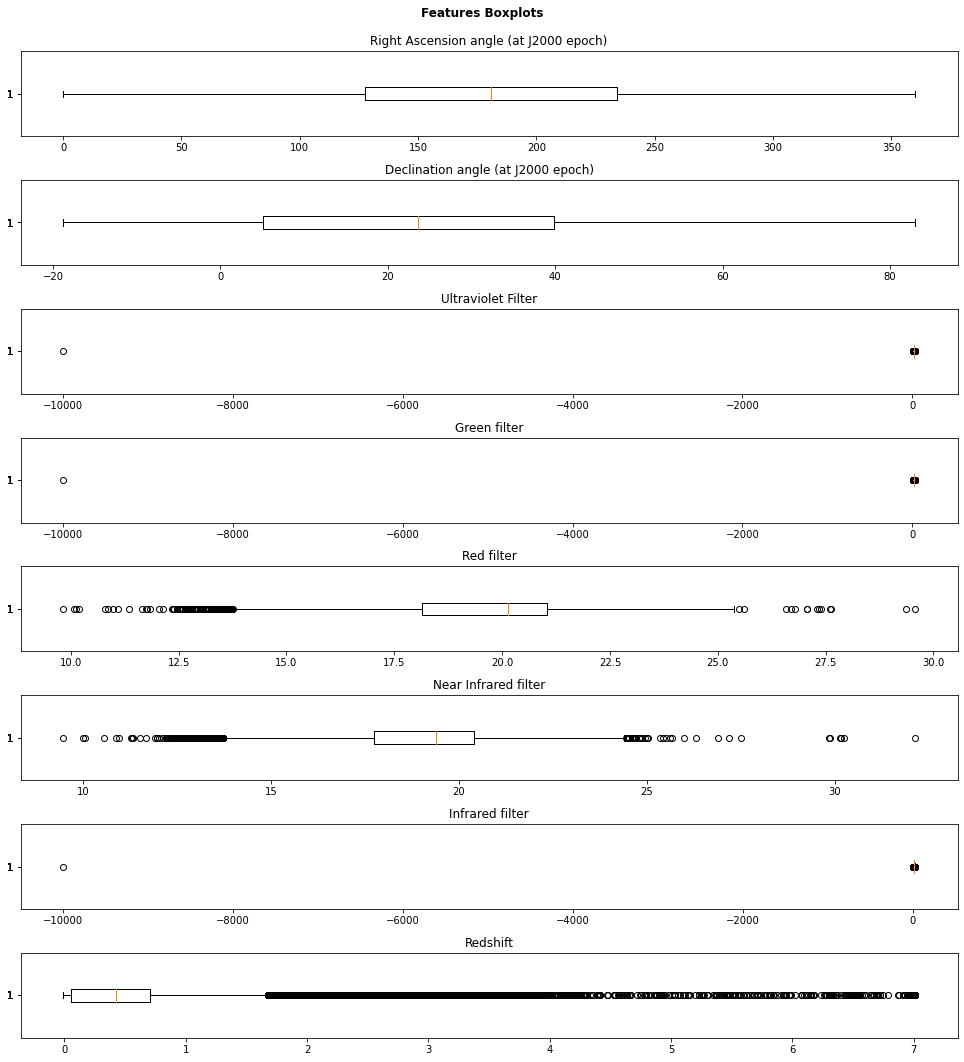

In [7]:
fig, ax = plt.subplots(8, 1, figsize=(13.5, 15), sharey=True)

ax[0].boxplot(df_filtered['RA'], vert = False)
ax[0].title.set_text('Right Ascension angle (at J2000 epoch)')
ax[1].boxplot(df_filtered['DEC'], vert = False)
ax[1].title.set_text('Declination angle (at J2000 epoch)')
ax[2].boxplot(df_filtered['ultraviolet'], vert = False)
ax[2].title.set_text('Ultraviolet Filter')
ax[3].boxplot(df_filtered['green'], vert = False)
ax[3].title.set_text('Green filter')
ax[4].boxplot(df_filtered['red'], vert = False)
ax[4].title.set_text('Red filter')
ax[5].boxplot(df_filtered['nir'], vert = False)
ax[5].title.set_text('Near Infrared filter')
ax[6].boxplot(df_filtered['ir'], vert = False)
ax[6].title.set_text('Infrared filter')
ax[7].boxplot(df_filtered['redshift'], vert = False)
ax[7].title.set_text('Redshift')

fig.suptitle('Features Boxplots\n', fontweight='bold')
# plt.subplots_adjust(left=0.1,
#                     bottom=0.2, 
#                     right=2.2,
#                     top=4.2, 
#                     wspace=0.4, 
#                     hspace=0.6)
plt.tight_layout()
#plt.show()

We can clearly see that the **Ultraviolet**, **Green** and **Infrared filters** have what apears to be one or more **extreme negative outliers**. To deal with them we must find them and remove them from the dataframe.

In [8]:
# finds the instances where the negative value could be in any of the filters discussed above

df_filtered.loc[(df_filtered['ultraviolet'] == -9.999000e+03) |
                (df_filtered['green'] == -9.999000e+03) |
                (df_filtered['ir'] == -9.999000e+03)]

,RA,DEC,ultraviolet,green,red,nir,ir,class,redshift
79543,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,STAR,0.000089


We can see that is just one instance and we shall remove it.

In [9]:
df_filtered = df_filtered.drop([79543], axis=0) # removes the instance 79543

We can now visualize the new features boxplots:

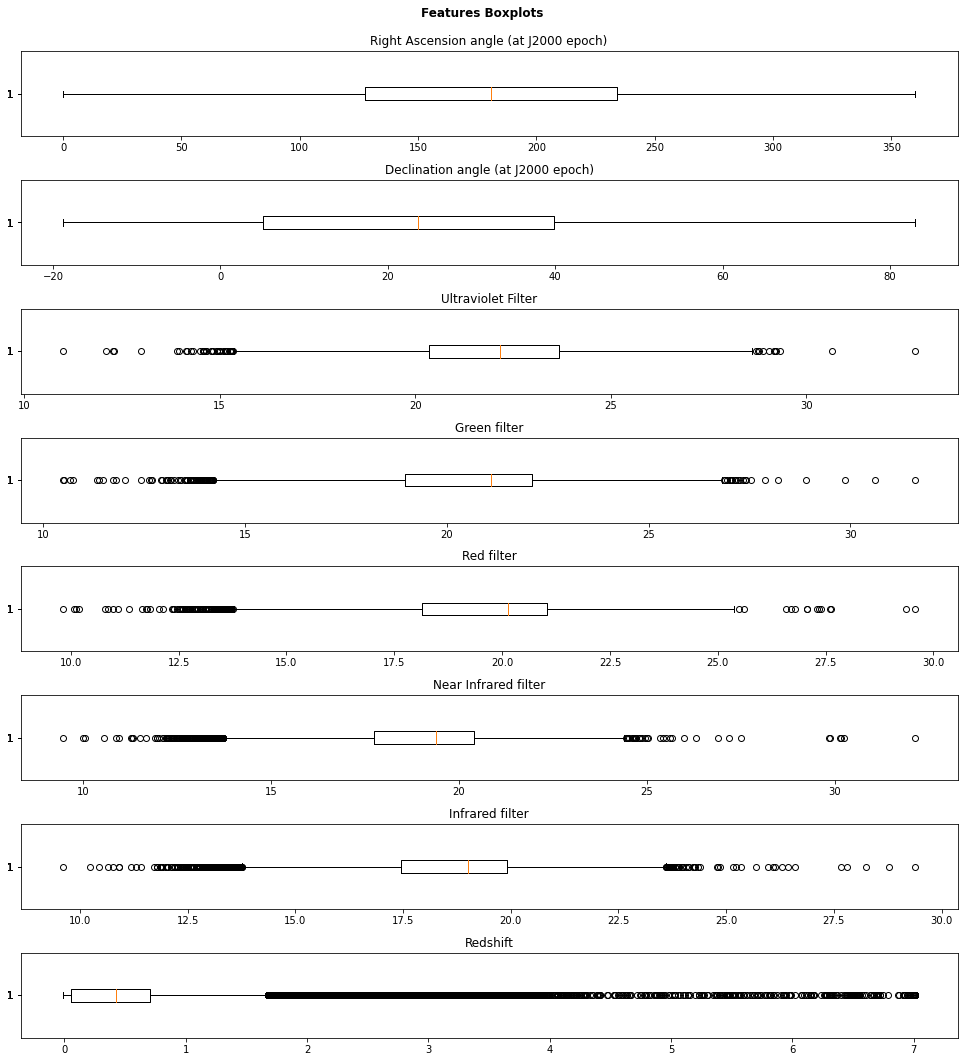

In [10]:
fig, ax = plt.subplots(8, 1, figsize=(13.5, 15), sharey=True)

ax[0].boxplot(df_filtered['RA'], vert = False)
ax[0].title.set_text('Right Ascension angle (at J2000 epoch)')
ax[1].boxplot(df_filtered['DEC'], vert = False)
ax[1].title.set_text('Declination angle (at J2000 epoch)')
ax[2].boxplot(df_filtered['ultraviolet'], vert = False)
ax[2].title.set_text('Ultraviolet Filter')
ax[3].boxplot(df_filtered['green'], vert = False)
ax[3].title.set_text('Green filter')
ax[4].boxplot(df_filtered['red'], vert = False)
ax[4].title.set_text('Red filter')
ax[5].boxplot(df_filtered['nir'], vert = False)
ax[5].title.set_text('Near Infrared filter')
ax[6].boxplot(df_filtered['ir'], vert = False)
ax[6].title.set_text('Infrared filter')
ax[7].boxplot(df_filtered['redshift'], vert = False)
ax[7].title.set_text('Redshift')

fig.suptitle('Features Boxplots\n', fontweight='bold')
plt.tight_layout()
plt.show()

**We still have many outliers in the filters, but they are not extreme and since these are observational data, they are real, relevant and important and shall not be discarded**.
<br></br>
The more distant the object is, the more it will be redshifted. So we already know that the outliers in the calculated redshifts are only galaxies and quasars. The stars in our galaxy can have a negative redshift, which means they are not moving away from us but instead towards us, or have an aproximately positive zero redshift for the ones that are moving away extremely slowly relative to us, but still within our galaxy. Some close galaxies, from our local group, will also have a negative redshift, i.e., they are moving towards us, such as the very well known Andromeda Galaxy, which we can see with our own eyes in a clear country night sky, and will collide with our Milky Way in about 4 billion years.<br></br>
Below we can see the redshift range for stars, galaxies and quasars in our dataframe.



In [11]:
stars = df_filtered[['redshift']].loc[df_filtered['class'] == 'STAR'].describe().transpose()
stars.rename({'redshift': 'Stars Redshift'}).style.highlight_max(subset=['min', 'max'], color = 'lightblue')

,count,mean,std,min,25%,50%,75%,max
Stars Redshift,21593.000000,-0.000115,0.000465,-0.004136,-0.000295,-0.000076,0.000075,0.004153


In [12]:
galaxies = df_filtered[['redshift']].loc[ (df_filtered['class'] == 'GALAXY') ].describe().transpose()
galaxies.rename({'redshift': 'Galaxies Redshift'}).style.highlight_max(subset=['min', 'max'], color = 'lightblue')

,count,mean,std,min,25%,50%,75%,max
Galaxies Redshift,59445.000000,0.421596,0.264858,-0.009971,0.164527,0.456274,0.594699,1.995524


In [13]:
quasars = df_filtered[['redshift']].loc[ (df_filtered['class'] == 'QSO') ].describe().transpose()
quasars.rename({'redshift': 'Quasars Redshift'}).style.highlight_max(subset=['min', 'max'], color = 'lightblue')

,count,mean,std,min,25%,50%,75%,max
Quasars Redshift,18961.000000,1.719676,0.913954,0.000461,1.106605,1.617232,2.220279,7.011245


<a id='3.3.3'></a>
#### 3.3.3. Correlation Matrix

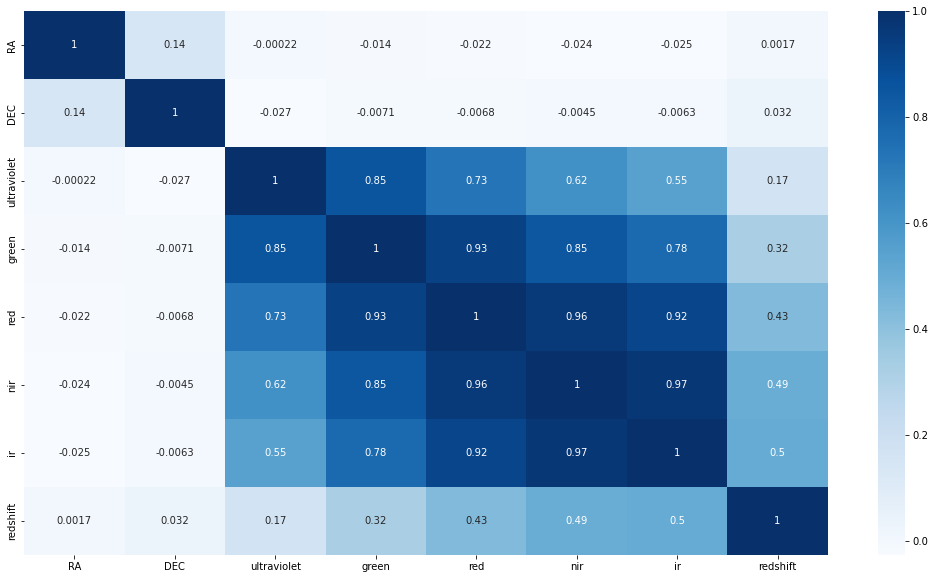

In [14]:
plt.figure(figsize=(18,10)) 
sns.heatmap(df_filtered.corr(), annot=True, cmap='Blues') 
plt.show()

From this correlation matrix we can observe that the most correlated features are all the filters correlating with each other, so these will have the most impact in our categorical target feature, **class**.

<a id='3.3.4'></a>
#### 3.3.4. Correlation Scatter Plots

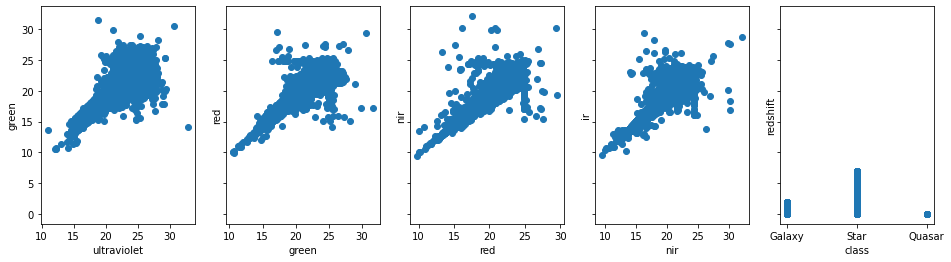

In [15]:
fig, ax = plt.subplots(1,5, figsize=(16, 4), sharey=True)

ax[0].scatter(df_filtered.loc[:,'ultraviolet'], df_filtered.loc[:,'green'])
ax[0].set_xlabel('ultraviolet')
ax[0].set_ylabel('green')
ax[1].scatter(df_filtered.loc[:,'green'], df_filtered.loc[:,'red'])
ax[1].set_xlabel('green')
ax[1].set_ylabel('red')
ax[2].scatter(df_filtered.loc[:,'red'], df_filtered.loc[:,'nir'])
ax[2].set_xlabel('red')
ax[2].set_ylabel('nir')
ax[3].scatter(df_filtered.loc[:,'nir'], df_filtered.loc[:,'ir'])
ax[3].set_xlabel('nir')
ax[3].set_ylabel('ir')
ax[4].scatter(df_filtered.loc[:,'class'], df_filtered.loc[:,'redshift']) # TO-DO: should be bar plot
ax[4].set_xlabel('class')
ax[4].set_ylabel('redshift')
ax[4].set_xticks([0,1,2], ['Galaxy', 'Star', 'Quasar'])

plt.show()

# TO-DO: Each class of objects should have a unique color so we can see their distribution across the scatter plots

<a id='3.3.5'></a>
#### 3.3.5. Target feature

The categorical feature **class** will be our target for the machine learning algorithms to predict, so lets have a close look at the data.

GALAXY    59445
STAR      21593
QSO       18961
Name: class, dtype: int64


Text(0.5, 1.0, '"Class" Occurrences')

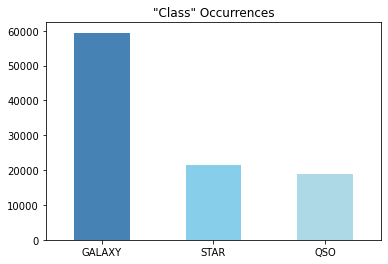

In [16]:
print(df_filtered['class'].value_counts())
df_filtered['class'].value_counts().plot.bar(rot=0, color=['steelblue','skyblue','lightblue'])
plt.title('"Class" Occurrences')

As we can observe, we have three distinct classes, where GALAXY is occuring much more frequently than the other two. This shows that we have an imbalanced dataset, and we will deal with it later. For now, we should convert this categorical feature to numerical in order to train our machine learning algorithms.

In [17]:
def cat_to_num(list):
    """
    A simple function that receives the feature 'class' and  returns them in integers
    """
    a = []
    for i in list:
        if i == 'GALAXY':
            a.append(0)
        elif i == 'STAR':
            a.append(1)
        else:
            a.append(2)
    return a

In [18]:
classes_count = list(df_filtered['class'].values) # creates a list of the feature 'class'
l = cat_to_num(classes_count) # converts the list to integers
df_filtered['class'] = l # rewrites them in the dataframe

# TO-DO: redo all above in a comprehension list

In [19]:
df_filtered.head(10)

,RA,DEC,ultraviolet,green,red,nir,ir,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0,0.116123
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,2,1.424659
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,2,0.586455
7,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,0,0.477009
8,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,0,0.660012
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,1,-0.000008


<a id='3.3.6'></a>
#### 3.3.6. Data Standardization

Since we have such a broad range of numerical data, in order for our algorithms to perform better, we need to scale to a standard range all the input features. To do this, we will use the method **StandardScaler** from the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">Scikit Learn Preprocessing module</a>.
The **class** feature that can have three integers will not be standardized.<br></br>
Note: I tested the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">MinMaxScaler</a>, but the models took too much time and heat for my computer to handle.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_filtered)

X = df_filtered.drop(['class'], axis = 'columns') # input data
y = df_filtered['class'] # output data (target)

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns) # input data scaled

<a id='4'></a>
## 4. Supervised Learning 

<a id='4.1'></a>
### 4.1. Train and test data

With the method **train_test_split** from the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">Scikit Learn model_selection</a> module, we will split the dataframe into a random train and testing data. An 80% size train data and 20% size test data will be used.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 20)

<a id='4.2'></a>
### 4.2. Support Vector Machines

<a id='4.2.1'></a>
#### 4.2.1. Support Vector Classification

We will start with the supervised learning model <a href="https://scikit-learn.org/stable/modules/svm.html">Support-Vector Machines</a> (SVMs), which can be used in classification or regression problems.
In this case, since we are trying to predict a categorical target, we will use the method <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC">Support Vector Classification</a> (SVC).
The SVC algorithm will be implemented with three different kernels:
* Linear Kernel (SVC linear)
* Polynomial Kernel (SVC poly)
* Radial Basis Function Kernel (SVC rbf)

The following code will print each SVC kernel model accuracy (they are in separate cells in order to be more easily played with, since the dataset is big and each model can take some time to run).

In [22]:
# Linear Kernel

start = time.time()

svc_model_linear = SVC(kernel="linear", C=1, random_state = 0)
svc_model_linear.fit(X_train, y_train)
print( 'SVC Accuracy (Linear Kernel): %.2f' % svc_model_linear.score(X_test, y_test) )

end = time.time()
print('Run time: %.2f s' % (end - start))

SVC Accuracy (Linear Kernel): 0.96
Run time: 75.51 s


In [43]:
# Polynomial Kernel

start = time.time()
svc_model_poly = SVC(kernel="poly", C=1, random_state = 0)
svc_model_poly.fit(X_train, y_train)
print('SVC Accuracy (Polynomial Kernel): %.2f' % svc_model_poly.score(X_test, y_test) )
end = time.time()
print('Run time: %.2f s' % (end - start))

SVC Accuracy (Polynomial Kernel): 0.95
Run time: 133.05 s


In [44]:
# Radial Basis Function Kernel

start = time.time()
svc_model_rbf = SVC(kernel="rbf", C=1, random_state = 0)
svc_model_rbf.fit(X_train, y_train)
print( 'SVC Accuracy (Radial Basis Function Kernel): %.2f' % svc_model_rbf.score(X_test, y_test) )
end = time.time()
print('Run time: %.2f s' % (end - start))

SVC Accuracy (Radial Basis Function Kernel): 0.96
Run time: 82.77 s


In [79]:
# Sigmoid Kernel

# takes too much time, low accuracy (69%)

# start = time.time()
# svc_model_sigmoid = SVC(kernel="sigmoid", C=1, random_state = 0)
# svc_model_sigmoid.fit(X_train, y_train)
# print( 'SVC Accuracy (Sigmoid Kernel): %.2f' % svc_model_sigmoid.score(X_test, y_test) )
# end = time.time()
# print('Run time: %.2f s' % (end - start))

SVC Accuracy (Sigmoid Kernel): 0.69
Run time: 263.54 s


Now we will save in three distinct variables, each for its respective SVC kernel, the target values the model predicted for the 20% size test data mentioned above.

In [45]:
y_predict_svc_linear = svc_model_linear.predict(X_test)
y_predict_svc_poly = svc_model_poly.predict(X_test)
y_predict_svc_rbf = svc_model_rbf.predict(X_test)

<a id='4.2.2'></a>
#### 4.2.2. SVC Confusion Matrices

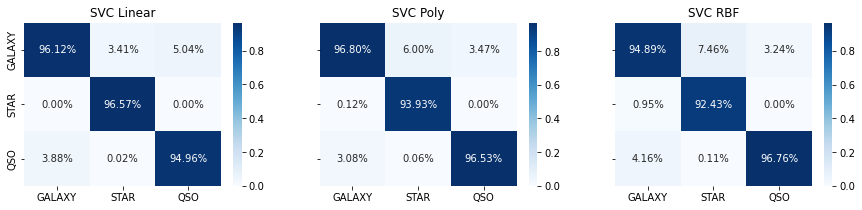

In [61]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 3), sharey=True)

svc_linear_matrix = confusion_matrix(y_test, y_predict_svc_linear, labels=[0,1,2])

cm_svc_linear = pd.DataFrame( svc_linear_matrix/sum(svc_linear_matrix),
                             index=['GALAXY', 'STAR', 'QSO'],
                             columns=['GALAXY', 'STAR', 'QSO'])

svc_poly_matrix = confusion_matrix(y_test, y_predict_svc_poly, labels=[0,1,2])

cm_svc_poly = pd.DataFrame(svc_poly_matrix/sum(svc_poly_matrix),
                             index=['GALAXY', 'STAR', 'QSO'],
                             columns=['GALAXY', 'STAR', 'QSO'])

svc_rbf_matrix = confusion_matrix(y_test, y_predict_svc_rbf, labels=[0,1,2])

cm_svc_rbf = pd.DataFrame( svc_rbf_matrix/sum(svc_rbf_matrix),
                           index=['GALAXY', 'STAR', 'QSO'],
                           columns=['GALAXY', 'STAR', 'QSO'])

sns.heatmap(cm_svc_linear, annot=True, cmap='Blues', fmt='.2%', ax=ax1)
ax1.set_title('SVC Linear')
sns.heatmap(cm_svc_poly, annot=True, cmap='Blues', fmt='.2%', ax=ax3)
ax2.set_title('SVC Poly')
sns.heatmap(cm_svc_rbf, annot=True, cmap='Blues', fmt='.2%', ax=ax2)
ax3.set_title('SVC RBF')


plt.show()

In [34]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (79999, 8)
X_test: (20000, 8)
y_train: (79999,)
y_test: (20000,)


<a id='4.2.3'></a>
#### 4.2.3. Discussion

Since SVM is well suited for classification of complex but small or medium sized datasets, with an accuracy of 96% for the linear and radial basis function kernels, we can say that this model performed well with a dataset of 99999 instances, of which 79999 were train data and 20000 were the testing data.<br>
From the confusion matrices we can see that we still have a small percentage of bad predicted target values between the three kernels, but we can try to play with the various SVC parameters in order to reduce them. We can create a for loop in order to test for each parameter change in a future implementation.

<a id='4.3'></a>
### 4.3. Random Forests

<a id='4.3.1'></a>
#### 4.3.1. Random Forest Classification

For the Random Forests algorithm, we will implement it with the method <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">RandomForestClassifier</a>, used for classification problemas as the name implies.

In [80]:
start = time.time()

classifier = RandomForestClassifier(n_estimators=28, random_state=0) # n_estimators = nº arvores de decisão que queremos da floresta
random_forest_model = classifier.fit(X_train, y_train)
print('Random Forest Accuracy: %.2f' % random_forest_model.score(X_test, y_test) )
y_predict_random_forest = random_forest_model.predict(X_test)

end = time.time()
print('Run time: %.2f s' % (end - start))

# print(classification_report(y_test,y_predict_random_forest))

Random Forest Accuracy: 0.98
Run time: 5.64 s


<a id='4.3.2'></a>
#### 4.3.2. Random Forest Confusion Matrix

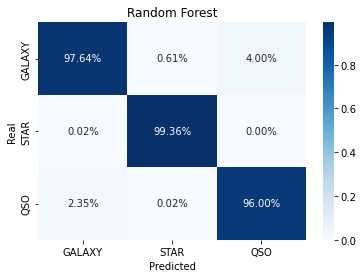

In [81]:
rf_matrix = confusion_matrix(y_test, y_predict_random_forest, labels=[0,1,2])

cm_random_forest = pd.DataFrame(rf_matrix/sum(rf_matrix),
                                index=['GALAXY', 'STAR', 'QSO'],
                                columns=['GALAXY', 'STAR', 'QSO'])

sns.heatmap(cm_random_forest, annot=True, cmap='Blues', fmt='.2%').set_title('Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

<a id='4.3.3'></a>
#### 4.3.3. Discussion

The Random Forest algorithm presented us with an accuracy of 98%, 2 points above the best SVC algorithm tested previously. Its confusion matrix also has less false positives and negatives. This is the most precise model so far.

<a id='4.4'></a>
### 4.4. Decision Trees

<a id='4.4.1'></a>
#### 4.4.1. Decision Tree 

For the Decision Tree algorithm we will use the method <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">DecisionTreeClassifier</a>.

In [123]:
start = time.time()

classifier = DecisionTreeClassifier(random_state=80) # best random state so far
dt_model = classifier.fit(X_train, y_train)
y_predict_decision_tree = dt_model.predict(X_test)
print('Decision Tree Accuracy: %.2f' % dt_model.score(X_test, y_test) )

end = time.time()
print('Run time: %.2f s' % (end - start))

# print(classification_report(y_test,y_predict_decision_tree))

Decision Tree Accuracy: 0.96
Run time: 1.30 s


<a id='4.4.2'></a>
#### 4.4.2. Decision Tree Confusion Matrix

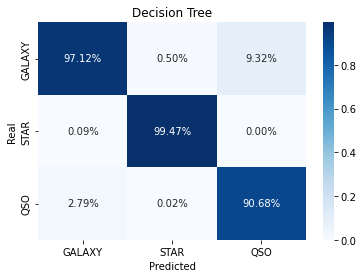

In [126]:
dt_matrix = confusion_matrix(y_test, y_predict_decision_tree, labels=[0,1,2])

cm_decision_tree = pd.DataFrame( (dt_matrix/sum(dt_matrix)),
                                index=['GALAXY', 'STAR', 'QSO'],
                                columns=['GALAXY', 'STAR', 'QSO'])

sns.heatmap(cm_decision_tree, annot=True, cmap='Blues', fmt='.2%').set_title('Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

<a id='4.4.3'></a>
#### 4.4.3. Discussion

With a 96% accuracy, this model is on par to the best kernel of the SVC model tested earlier. One major advantage is its speed in relation to all the other models tested.

<a id='5'></a>
## 5. Conclusions

Given the relative big size of the dataset used in this project, we can conclude that the three supervised learning algorithms that we tested gave us very good results in predicting the classification target. The most accurate model and with the lowest false positives and false negatives was the **Random Forest**, although not the fasted or slowest of the three. For each model used, more tests need to be made with different combinations of parameters, in order to improve their accuracy and other scores.

<a id='6'></a>
## 6. Future Work

In order to continue to improve on the work presented today, we shall implement new supervised learning algorithms and later try to adventure into the unsupervised learning models.

<a id='7'></a>
## 7. Bibliography

* The Sloan Digital Sky Survey
https://arxiv.org/abs/astro-ph/9805314
* The Seventeenth Data Release of the Sloan Digital Sky Surveys: Complete Release of MaNGA, MaStar and APOGEE-2 Data
https://arxiv.org/abs/2112.02026
* The 2.5 m Telescope of the Sloan Digital Sky Survey
https://arxiv.org/abs/astro-ph/0602326
* The Sloan Digital Sky Survey Photometric Camera
https://arxiv.org/abs/astro-ph/9809085
* https://www.sdss.org/science/data-release-publications
* https://phys.org/news/2018-05-20th-anniversary-sdss-telescope.html
* https://en.wikipedia.org/wiki/Sloan_Digital_Sky_Survey
* https://en.wikipedia.org/wiki/Photometry_(astronomy)
* https://en.wikipedia.org/wiki/Redshift_survey
* https://scikit-learn.org/stable/index.html